# Настройка окружения

## Импортирование библиотек

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import gseapy
import os
import requests
from tqdm.notebook import tqdm
import pickle
import time

## Глобальные переменные

In [2]:
filedir = '../results'
os.listdir(filedir)

['counts.csv',
 'gene_length.csv',
 'de_results.csv',
 'tmm_edgeR.csv',
 'tmm_filtered_edgeR.csv',
 'geneid_to_name.pkl',
 'rpkm.csv']

## Подгрузка файлов

### Вспомогательные файлы

In [8]:
with open(f'{filedir}/geneid_to_name.pkl', 'rb') as f:
    geneid_to_name = pickle.load(f)
len(geneid_to_name)

21608

Добавим к генам с одинаковыми названиями префикс

In [10]:
from collections import defaultdict
count_names = defaultdict(int)

for geneid, genename in geneid_to_name.items():
    if count_names[genename]:
        geneid_to_name[geneid] = f'{genename}.{count_names[genename]}'
    count_names[genename] += 1

In [11]:
geneid_to_name['ENSMUSG00000089945'], geneid_to_name['ENSMUSG00000038729']

('Pakap.1', 'Pakap.2')

In [12]:
gene_length = pd.read_csv(f'{filedir}/gene_length.csv', index_col=0)
gene_length.index = gene_length.index.map(lambda x: geneid_to_name.get(x, x))
gene_length.head()

,length
Gene stable ID,
mt-Nd1,956
mt-Nd2,1037
mt-Co1,1544
mt-Co2,683
mt-Atp8,203


### Результаты DE

In [17]:
de_res = pd.read_csv(f'{filedir}/de_results.csv', index_col=0)
de_res.index = de_res.index.map(lambda x: geneid_to_name.get(x, x))
de_res.head()

,logFC,logCPM,LR,PValue,FDR
Krt17,11.806160,8.528377,2806.544502,0.0,0.0
Sprr5,11.038127,5.780197,1657.367355,0.0,0.0
Ly6g6c,10.912516,7.289780,1580.148315,0.0,0.0
Krt8,10.820563,8.590946,2279.239617,0.0,0.0
Krt84,10.718822,5.968469,1870.129595,0.0,0.0


### Экспрессия

In [13]:
counts = pd.read_csv(f'{filedir}/counts.csv', index_col=0)
counts.index = counts.index.map(lambda x: geneid_to_name.get(x, x))
counts.head()

,SRR3414631,SRR3414630,SRR3414636,SRR3414637,SRR3414635,SRR3414629
Gene stable ID,,,,,,
mt-Nd1,57039,43493,51029,63237,52101,45624
mt-Nd2,43560,32273,31116,34681,31629,33351
mt-Co1,113347,75750,76672,87061,78155,86348
mt-Co2,45,36,22,39,36,26
mt-Atp8,3,1,3,0,4,5


In [15]:
tmm = pd.read_csv(f'{filedir}/tmm_edgeR.csv', index_col=0)
tmm.index = tmm.index.map(lambda x: geneid_to_name.get(x, x))
tmm.head()

,SRR3414631,SRR3414630,SRR3414636,SRR3414637,SRR3414635,SRR3414629
mt-Nd1,2984.430457,3660.281667,3401.445190,4254.500453,3363.027316,2774.528495
mt-Nd2,2279.173736,2716.029482,2074.102344,2333.291115,2041.595957,2028.171572
mt-Co1,5930.613072,6374.964621,5110.733222,5857.347185,5044.766893,5251.073699
mt-Co2,2.354518,3.029686,1.466456,2.623868,2.323736,1.581136
mt-Atp8,0.156968,0.084158,0.199971,0.000000,0.258193,0.304065


In [16]:
tmm_filt = pd.read_csv(f'{filedir}/tmm_filtered_edgeR.csv', index_col=0)
tmm_filt.index = tmm_filt.index.map(lambda x: geneid_to_name.get(x, x))
tmm_filt.head()

,SRR3414631,SRR3414630,SRR3414636,SRR3414637,SRR3414635,SRR3414629
mt-Nd1,2984.357622,3686.990295,3393.809694,4249.820874,3353.209037,2781.847797
mt-Nd2,2279.118113,2735.848017,2069.446441,2330.724698,2035.635566,2033.521959
mt-Co1,5930.468336,6421.481959,5099.260751,5850.904614,5030.038815,5264.926214
mt-Co2,2.354461,3.051793,1.463164,2.620982,2.316952,1.585307
mt-Atp6,1.674283,1.525897,1.130627,1.075275,1.737714,1.158494


In [14]:
rpkm = pd.read_csv(f'{filedir}/rpkm.csv', index_col=0)
rpkm.index = rpkm.index.map(lambda x: geneid_to_name.get(x, x))
rpkm.head()

,SRR3414631,SRR3414630,SRR3414636,SRR3414637,SRR3414635,SRR3414629
Gene stable ID,,,,,,
mt-Nd1,3270.305713,4009.491149,3417.475738,4247.303617,3379.566314,3004.020693
mt-Nd2,2302.414210,2742.763543,1921.105790,2147.399246,1891.383129,2024.405729
mt-Co1,4023.806393,4323.775414,3179.331190,3620.564564,3138.934673,3520.241354
mt-Co2,3.611321,4.645255,2.062283,3.666434,3.268546,2.396184
mt-Atp8,0.810027,0.434142,0.946175,0.000000,1.221903,1.550392


Пересчитаем RPKM на фильтрованых генах

In [18]:
# функция для подсчёта rpkm
def rpkm_calc(sample_counts):
    return sample_counts / (gene_length.loc[tmm_filt.index].length.values * sample_counts.sum()) * 1e9

In [21]:
rpkm_filt = counts.loc[tmm_filt.index].apply(rpkm_calc)
rpkm_filt.head()

,SRR3414631,SRR3414630,SRR3414636,SRR3414637,SRR3414635,SRR3414629
mt-Nd1,3272.697600,4012.308698,3419.171202,4249.408949,3381.217292,3006.110464
mt-Nd2,2304.098186,2744.690937,1922.058881,2148.463684,1892.307103,2025.814023
mt-Co1,4026.749387,4326.813816,3180.908507,3622.359230,3140.468098,3522.690238
mt-Co2,3.613963,4.648520,2.063306,3.668251,3.270143,2.397851
mt-Atp6,2.581267,2.334514,1.601407,1.511563,2.463427,1.760006


## Вспомогательные функции

In [23]:
def p_val_group(value):
    if value >= 0.05:
        return 'No significance'
    elif  0.01 <= value < 0.05:
        return 'p < 0.05'
    elif  0.001 <= value < 0.01:
        return 'p < 0.01'
    else:
        return 'p < 0.001'

In [24]:
color_discrete_map = {'No significance': 'darkblue',
                      'p < 0.05': 'purple',
                      'p < 0.01': 'darkorange',
                      'p < 0.001': 'yellow'}

In [25]:
class GeneCluster:
    def __init__(self, genes, descr, label, background_genes, **kwargs):
        self.label = label
        self.genes = genes
        self.descr = descr
        self.background_genes = background_genes
        self.userlist_id = self._get_userlist_id()
        self.background_id = self._get_background_id()
        self.enrichment_res = dict()


    def _get_userlist_id(self):
        base_url = "https://maayanlab.cloud/speedrichr"

        description = "sample gene set with background"

        res = requests.post(
            base_url+'/api/addList',
            files=dict(
              list=(None, '\n'.join(self.genes)),
              description=(None, description),
            )
          )
        if res.ok:
            userlist_response = res.json()
        else:
            raise Exception('Error analyzing gene list')
        return userlist_response['userListId']

    def _get_background_id(self):
        base_url = "https://maayanlab.cloud/speedrichr"

        res = requests.post(
            base_url+'/api/addbackground',
            data=dict(background='\n'.join(self.background_genes))
        )

        if res.ok:
            background_response = res.json()
        else:
            raise Exception('Error analyzing gene list')
        return background_response['backgroundid']

    def enrich(self, gene_set_library):
        # get enrichment results
        base_url = "https://maayanlab.cloud/speedrichr"

        res = requests.post(
                base_url+'/api/backgroundenrich',
                data=dict(
                userListId=self.userlist_id,
                backgroundid=self.background_id,
                backgroundType=gene_set_library,
                )
            )
        if res.ok:
            data = res.json()
        else:
            raise Exception('Error analyzing gene list')
        # convert results to df
        columns = ['Rank', 'Term', 'p-val', 'Z-score', 'Combined score', 'Overlapping genes', 'Adjusted P-value', 'Old p-value', 'Old adjusted p-value']
        results = pd.DataFrame(data[gene_set_library], columns=columns)
        # preprocess df
        results.Term = results.Term.astype(str)
        results['num_overlap_genes'] = results['Overlapping genes'].apply(lambda x: len(x))
        results['neg_log10(p_adj)'] = - np.log10(results['Adjusted P-value'])
        results['cluster_label'] = self.label
        # save to enrichment_res
        self.enrichment_res[gene_set_library] = results

    @staticmethod
    def enrich_geneclusters(geneclusters, gene_set_library):
        for gc in geneclusters:
            gc.enrich(gene_set_library)

# Анализ результатов

## Сравнение нормализаций

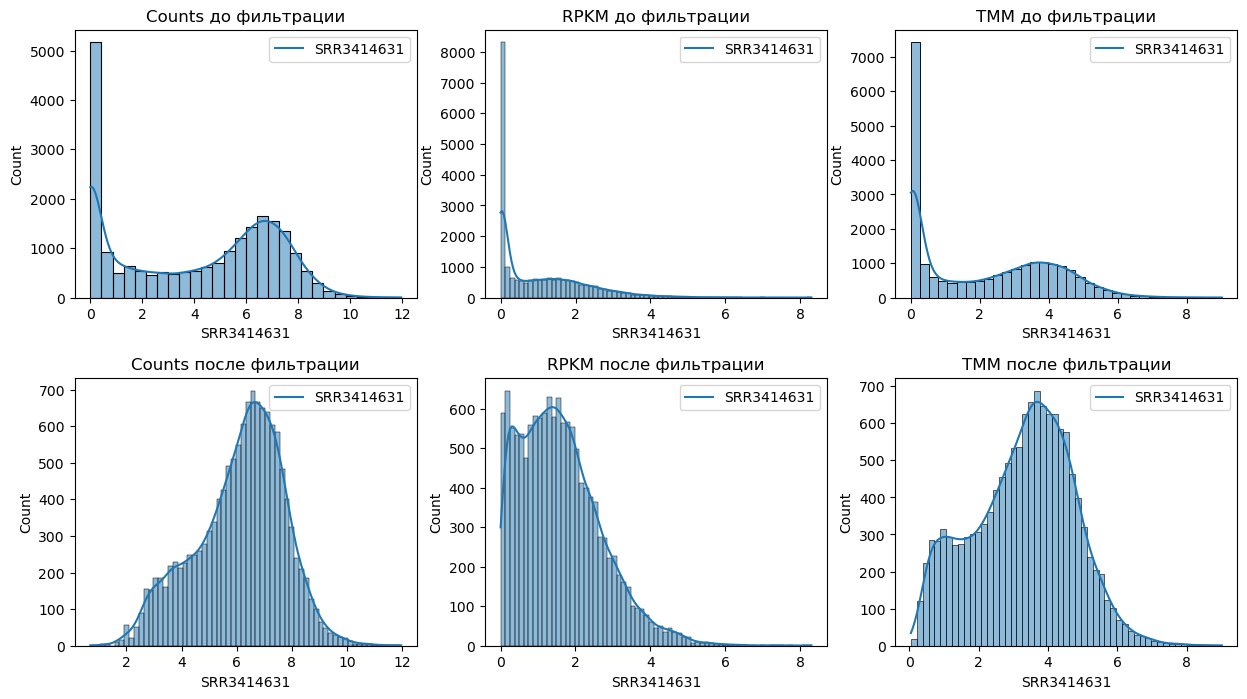

In [33]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8), gridspec_kw={'hspace': 0.3})
sample_name = 'SRR3414631'

# до фильтрации
sns.histplot(np.log1p(counts[sample_name]), kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Counts до фильтрации')
ax[0, 0].legend([sample_name])

sns.histplot(np.log1p(rpkm[sample_name]), kde=True, ax=ax[0, 1])
ax[0, 1].set_title('RPKM до фильтрации')
ax[0, 1].legend([sample_name])

sns.histplot(np.log1p(tmm[sample_name]), kde=True, ax=ax[0, 2])
ax[0, 2].set_title('TMM до фильтрации')
ax[0, 2].legend([sample_name])

# После фильтрации
sns.histplot(np.log1p(counts.loc[rpkm_filt.index, sample_name]), kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Counts после фильтрации')
ax[1, 0].legend([sample_name])

sns.histplot(np.log1p(rpkm_filt[sample_name]), kde=True, ax=ax[1, 1])
ax[1, 1].set_title('RPKM после фильтрации')
ax[1, 1].legend([sample_name])

sns.histplot(np.log1p(tmm_filt[sample_name]), kde=True, ax=ax[1, 2])
ax[1, 2].set_title('TMM после фильтрации')
ax[1, 2].legend([sample_name])

Видим, что распределения каунтов и TMM похожи между собой и отличаются от RPKM. Это из-за того, что RPKM учитывает длинну гена и соответсвенно занижает экспрессию для длинных генов 

## Экспрессия WNT4

По результатам анализа деференциальной экспрессии экспрессия гена WNT4 значимо различается между группами

In [36]:
de_res.loc['Wnt4'].to_frame().T

,logFC,logCPM,LR,PValue,FDR
Wnt4,-0.747517,3.967487,14.580468,0.000134,0.000334


Посмотрим на экспрессию для каждой из групп

In [45]:
plot_df = counts.loc['Wnt4'].sort_index().to_frame()
plot_df.columns = ['counts']
plot_df['rpkm'] = rpkm_filt.loc['Wnt4']
plot_df['tmm'] = tmm_filt.loc['Wnt4']
plot_df['condition'] = ['reprog', 'reprog', 'reprog', 'ctrl', 'ctrl', 'ctrl']
plot_df = plot_df.reset_index()
plot_df

,index,counts,rpkm,tmm,condition
0,SRR3414629,247,3.714121,15.060416,reprog
1,SRR3414630,98,2.063234,8.307660,reprog
2,SRR3414631,213,2.789081,11.144448,reprog
3,SRR3414635,279,4.132175,17.956379,ctrl
4,SRR3414636,333,5.092084,22.146988,ctrl
5,SRR3414637,271,4.155986,18.212462,ctrl


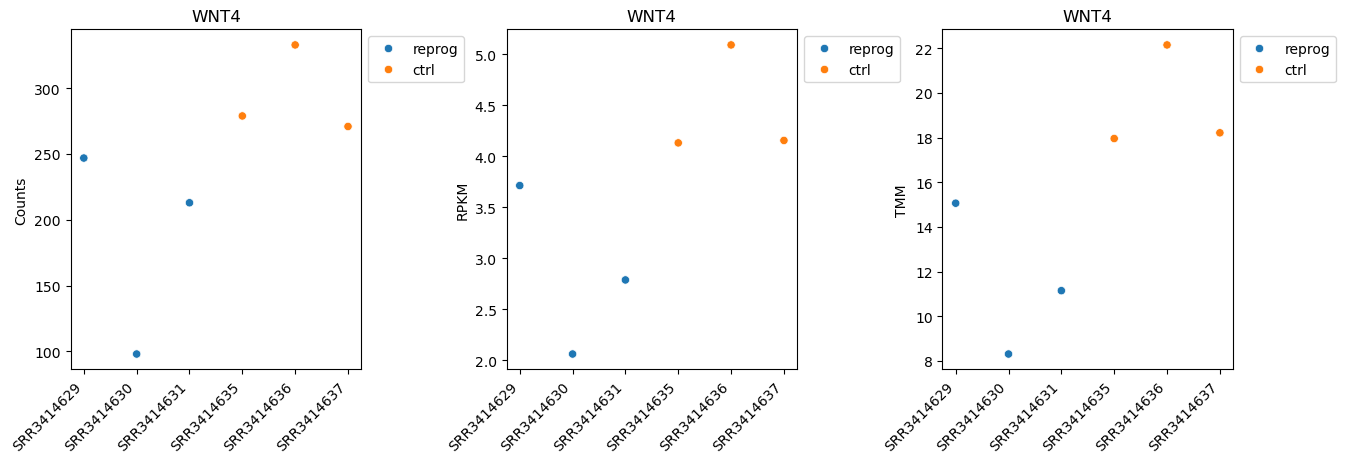

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'hspace': 0.3, 'wspace': 0.5})
fig.autofmt_xdate(rotation=45)

# до фильтрации
sns.scatterplot(plot_df, x='index', y='counts', hue='condition', ax=ax[0])
ax[0].set_title('WNT4')
ax[0].set_xlabel('')
ax[0].set_ylabel('Counts')
ax[0].legend(fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))

sns.scatterplot(plot_df, x='index', y='rpkm', hue='condition', ax=ax[1])
ax[1].set_title('WNT4')
ax[1].set_xlabel('')
ax[1].set_ylabel('RPKM')
ax[1].legend(fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))

sns.scatterplot(plot_df, x='index', y='tmm', hue='condition', ax=ax[2])
ax[2].set_title('WNT4')
ax[2].set_xlabel('')
ax[2].set_ylabel('TMM')
ax[2].legend(fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))

## GSA

### Подготовим данные

Сделаем GSA для баз данных GO, KEGG и MSigDB

In [47]:
# Приведем названия генов к верхнему регистру (так они обычно хранятся в базах данных)
de_res.index = de_res.index.str.upper()
de_res.head()

,logFC,logCPM,LR,PValue,FDR
KRT17,11.806160,8.528377,2806.544502,0.0,0.0
SPRR5,11.038127,5.780197,1657.367355,0.0,0.0
LY6G6C,10.912516,7.289780,1580.148315,0.0,0.0
KRT8,10.820563,8.590946,2279.239617,0.0,0.0
KRT84,10.718822,5.968469,1870.129595,0.0,0.0


Отберём upregulated и downregulated гены

In [49]:
genesets = dict()
genesets['upreg'] = de_res[(de_res.FDR < 0.05) & (de_res.logFC > 0)].index.to_list()
genesets['downreg'] = de_res[(de_res.FDR < 0.05) & (de_res.logFC < 0)].index.to_list()

Воспользуемся API сайта [enrichr](https://maayanlab.cloud/Enrichr/#libraries) чтобы сделать GSA

In [50]:
gene_clust = list()
enrich_results = list()
background_genes = de_res.index.to_list()

for label, genes in tqdm(genesets.items()):
    descr = f'{label} for comparison reprog vs ctrl'
    gene_clust.append(GeneCluster(genes, descr, label, background_genes))
    time.sleep(1)

  0%|          | 0/2 [00:00<?, ?it/s]

### GO Biological Process

In [51]:
db_name = 'GO_Biological_Process_2023'
GeneCluster.enrich_geneclusters(gene_clust,db_name )

In [52]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head(2)

,Rank,p-val,Z-score,Combined score,Overlapping genes,Adjusted P-value,Old p-value,Old adjusted p-value,num_overlap_genes,neg_log10(p_adj),cluster_label
Term,,,,,,,,,,,
DNA Metabolic Process (GO:0006259),1,1.079889e-13,2.510733,74.962308,"[DCLRE1B, TRRAP, NUDT1, YY1, HELB, TRIM28, RUV...",5.343291e-10,0,0,143,9.272191,upreg
Ribosome Biogenesis (GO:0042254),2,1.290177e-10,2.939515,66.935910,"[NVL, POP4, WDR3, MRPS12, FCF1, NAT10, MRPL36,...",3.191898e-07,0,0,83,6.495951,upreg


In [53]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 15)].index.unique()
terms.size

28

In [54]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

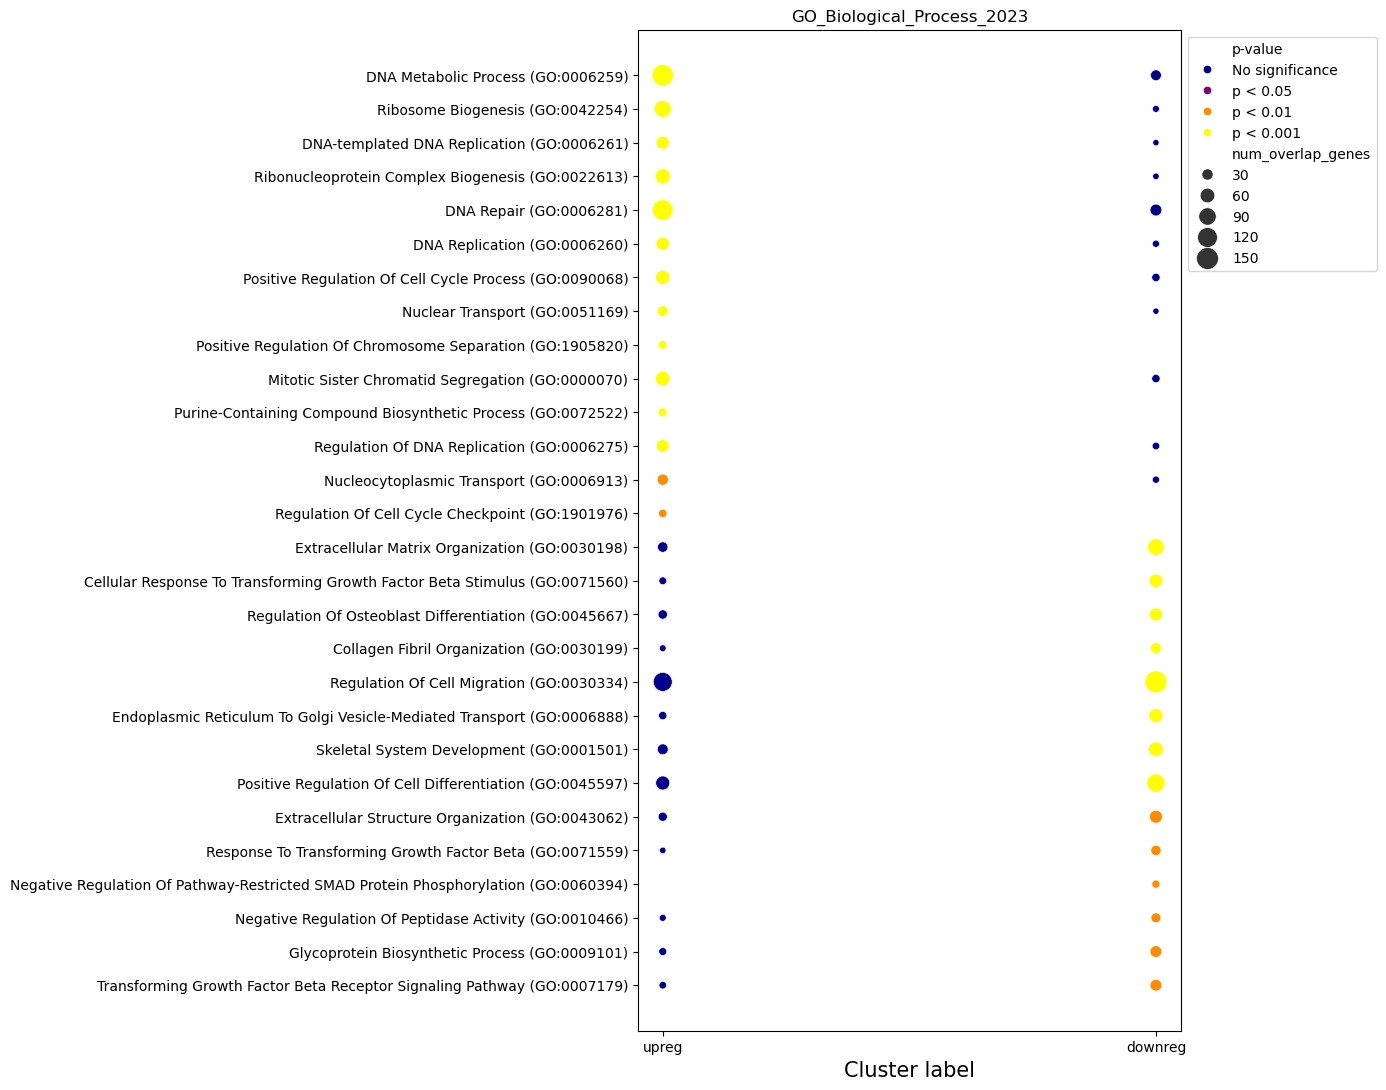

In [55]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 13), dpi=100)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

### KEGG

In [56]:
db_name = 'KEGG_2019_Mouse'
GeneCluster.enrich_geneclusters(gene_clust,db_name )

In [57]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head(2)

,Rank,p-val,Z-score,Combined score,Overlapping genes,Adjusted P-value,Old p-value,Old adjusted p-value,num_overlap_genes,neg_log10(p_adj),cluster_label
Term,,,,,,,,,,,
Ribosome biogenesis in eukaryotes,1,6.063340e-13,5.993189,168.596483,"[POP5, NXT1, POP1, NVL, POP4, RPP30, WDR3, FCF...",1.812939e-10,0,0,52,9.741617,upreg
DNA replication,2,3.764553e-08,7.355728,125.746555,"[PRIM2, FEN1, RNASEH2B, RNASEH2A, PCNA, MCM7, ...",5.628007e-06,0,0,27,5.249645,upreg


In [58]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 15)].index.unique()
terms.size

24

In [59]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

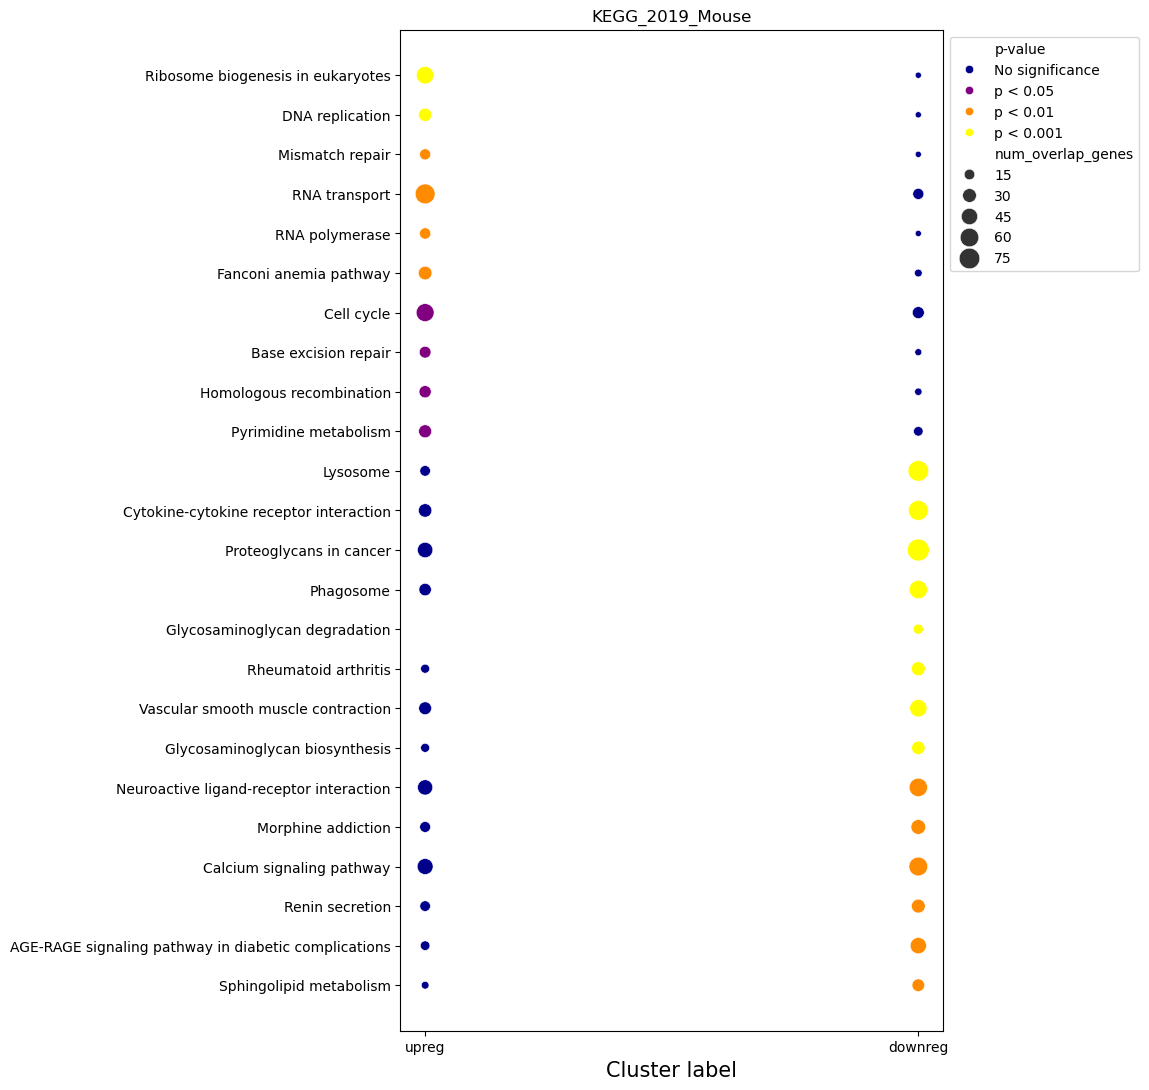

In [60]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 13), dpi=100)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

### MSigDB

In [61]:
db_name = 'MSigDB_Hallmark_2020'
GeneCluster.enrich_geneclusters(gene_clust,db_name )

In [62]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head(2)

,Rank,p-val,Z-score,Combined score,Overlapping genes,Adjusted P-value,Old p-value,Old adjusted p-value,num_overlap_genes,neg_log10(p_adj),cluster_label
Term,,,,,,,,,,,
E2F Targets,1,1.458456e-40,7.854755,720.485413,"[DCLRE1B, JPT1, NUP107, TFRC, CSE1L, BUB1B, MK...",7.292282e-39,0,0,151,38.137137,upreg
G2-M Checkpoint,2,9.636482e-26,4.691244,270.223439,"[JPT1, CCNT1, CCNF, MKI67, SMC4, SMC2, CDC20, ...",2.409120e-24,0,0,133,23.618141,upreg


In [63]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 15)].index.unique()
terms.size

22

In [64]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

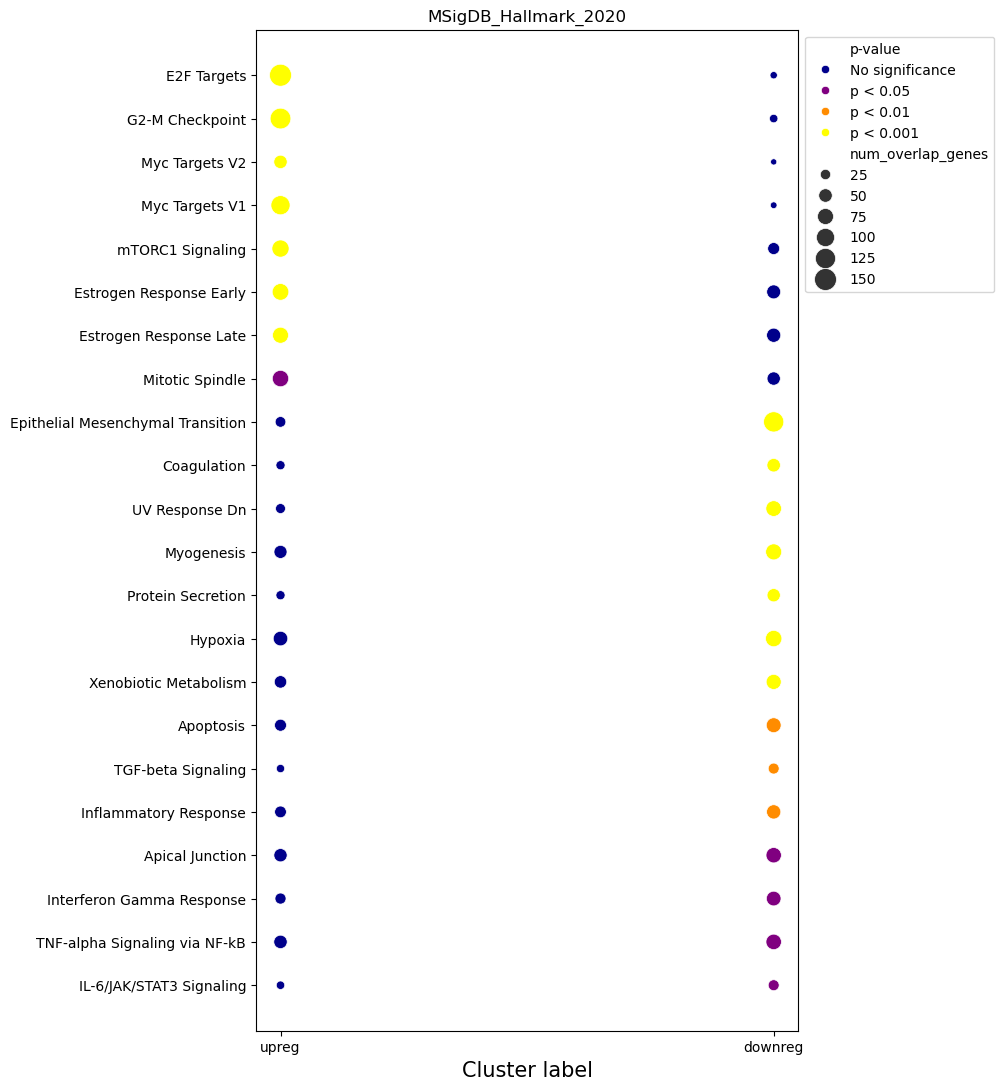

In [65]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 13), dpi=100)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## GSEA

Отранжируем гены для GSEA

In [106]:
gene_rank = (-np.log10(de_res.FDR + 1e-6) * de_res.logFC).sort_values(ascending=False).to_frame()
gene_rank.head()

,0
KRT6A,79.651456
ESRP1,76.416405
2300002M23RIK,76.009087
MAGEA13,73.373136
PRSS32,73.198145


### MSigDB

In [107]:
db_name = 'MSigDB_Hallmark_2020'

In [108]:
pre_res = gseapy.prerank(rnk=gene_rank, # or rnk = rnk,
                     gene_sets=db_name,
                     threads=4,
                     min_size=5,
                     max_size=1000,
                     permutation_num=4000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=4,
                     verbose=True, # see what's going on behind the scenes
                    )

2024-03-27 15:50:17,771 [INFO] Parsing data files for GSEA.............................
2024-03-27 15:50:17,774 [INFO] Enrichr library gene sets already downloaded in: /home/claptar/.cache/gseapy, use local file
2024-03-27 15:50:17,800 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-03-27 15:50:17,805 [INFO] 0050 gene_sets used for further statistical testing.....


2024-03-27 15:50:17,808 [INFO] Start to run GSEA...Might take a while..................
2024-03-27 15:50:43,120 [INFO] Congratulations. GSEApy runs successfully................



In [109]:
gsea_res = pre_res.res2d
gsea_res['neg_log10(FDR)'] = -np.log10(gsea_res['FDR q-val'].astype(float) + 1e-6)
gsea_res['FDR'] = gsea_res['FDR q-val'].astype(float).apply(p_val_group).astype(cat_type)
gsea_res.head()

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,neg_log10(FDR),FDR
0,prerank,Epithelial Mesenchymal Transition,-0.594224,-2.043092,0.0,0.0,0.0,98/187,13.41%,RGS4;ABI3BP;TNFRSF11B;FMOD;PTX3;SERPINE1;CDH6;...,6.000000,p < 0.001
1,prerank,UV Response Dn,-0.504317,-1.643875,0.0,0.042226,0.011877,45/142,13.56%,RGS4;SERPINE1;F3;GCNT1;FBLN5;EFEMP1;BDNF;TFPI;...,1.374405,p < 0.05
2,prerank,E2F Targets,0.720949,1.386059,0.0,0.126859,0.1465,134/194,24.43%,MYBL2;MYC;BARD1;UNG;TFRC;BRCA2;BRCA1;AURKA;ESP...,0.896676,No significance
3,prerank,Interferon Alpha Response,-0.428066,-1.333558,0.012658,0.283269,0.118774,25/77,18.83%,IFIT3;IL7;CSF1;LGALS3BP;IFI27;TENT5A;TAP1;TRAF...,0.547799,No significance
4,prerank,G2-M Checkpoint,0.691875,1.328622,0.0,0.197856,0.38625,112/196,22.84%,MYBL2;MYC;BARD1;BRCA2;E2F2;AURKA;CDC6;ESPL1;CD...,0.703649,No significance


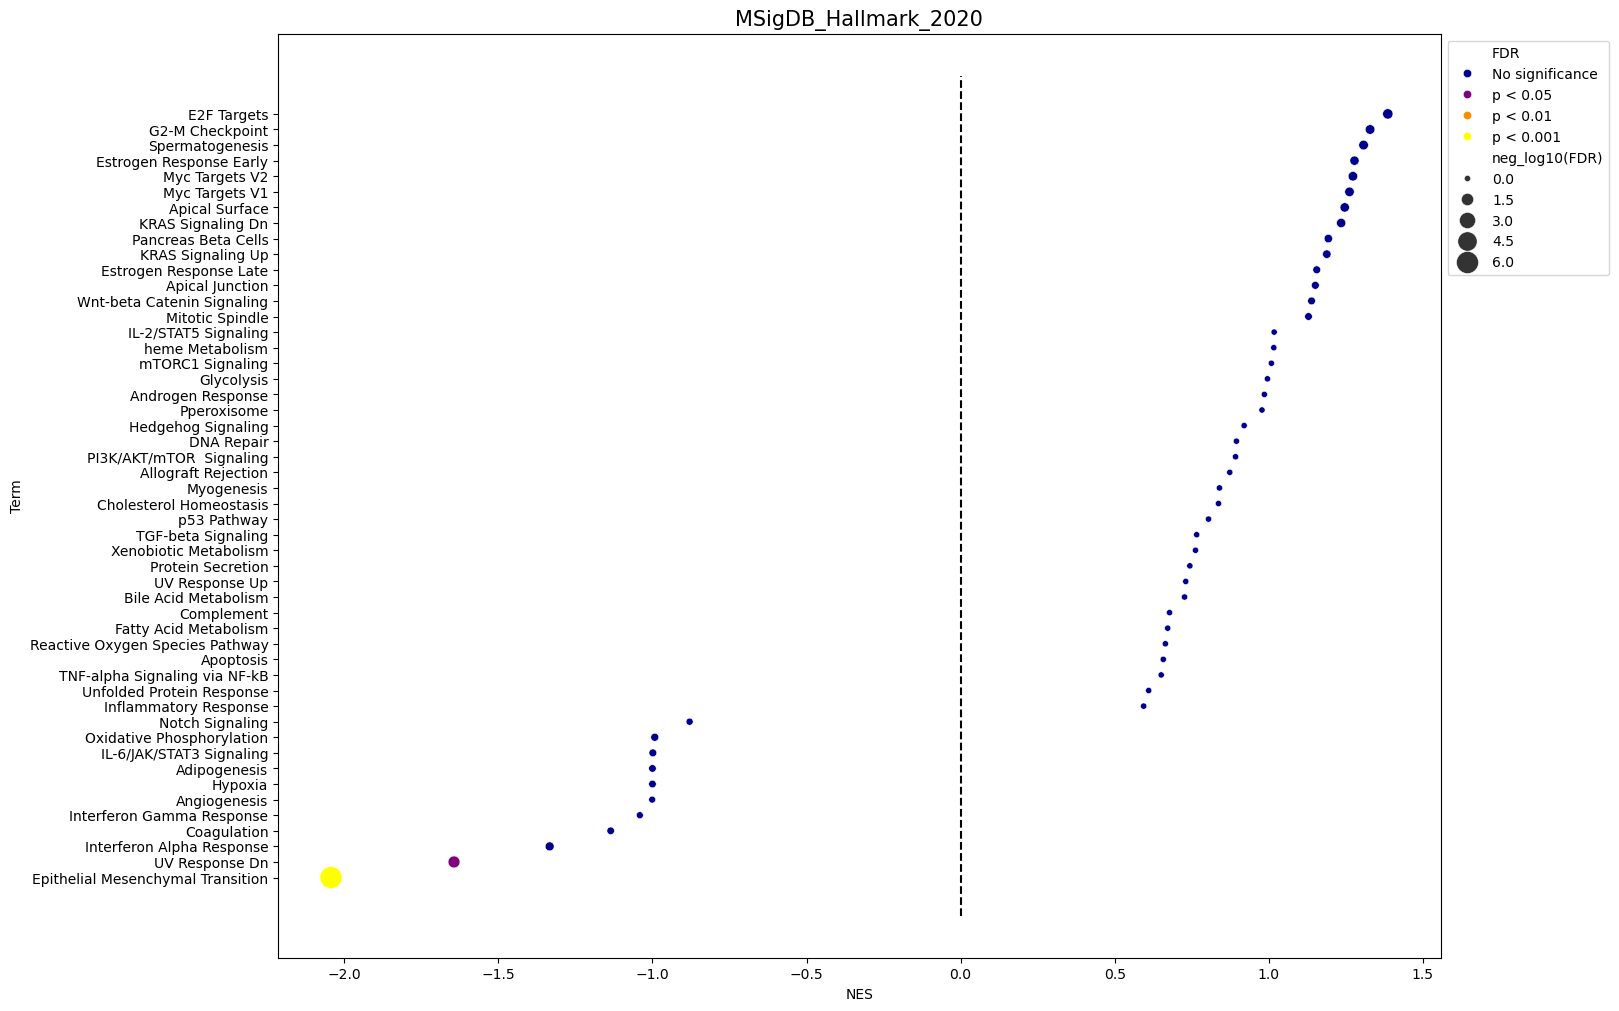

In [110]:
fig, ax = plt.subplots(figsize=(15, 12))

sns.scatterplot(
    data=gsea_res.sort_values(by='NES', ascending=False),
    x='NES',
    y='Term',
    hue='FDR',
    size='neg_log10(FDR)',
    sizes=(20, 250),
    palette=color_discrete_map,
    ax=ax
)
ymin, ymax = ax.get_ylim()

ax.vlines(x=0, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed')
# ax.vlines(x=-np.log10(0.05), ymin=ymin, ymax=ymax, colors='black', linestyles='dashed')
ax.set_title(db_name, fontsize=15)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))